# Playing with NetworkX

In [4]:
import networkx as nx
G=nx.Graph()

In [5]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [6]:
G.add_node("s")

In [7]:
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(4,5)
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (4, 5)])

In [8]:
import matplotlib.pyplot as plt

C:\Users\zhpok\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


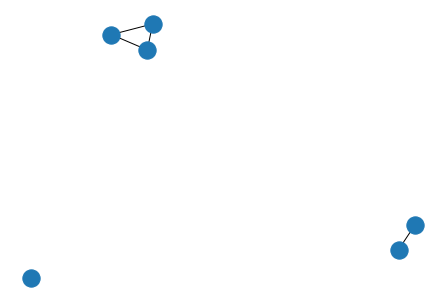

In [9]:
nx.draw(G)

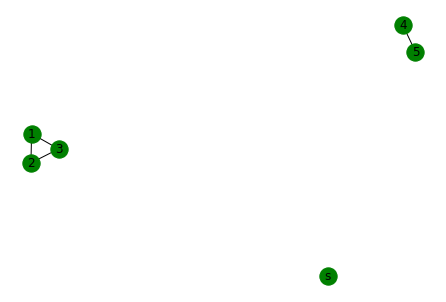

In [10]:
nx.draw(G,with_labels=1,node_color='g')

# Hard coded shapes an random test code things

In [11]:
#hard coded kevin matrix
#row is a face and column is a vertex
tetrahedron = [
    [1,1,1,0],
    [1,0,1,1],
    [1,1,0,1],
    [0,1,1,1]
]
sqaure = [
    [1,1,1,1,0,0,0,0],
    [1,1,0,0,1,1,0,0],
    [0,1,1,0,0,1,1,0],
    [0,0,1,1,0,0,1,1],
    [1,0,0,1,1,0,0,1],
    [0,0,0,0,1,1,1,1]
]

In [12]:
#import the alphabet to label faces
from string import ascii_uppercase
print(ascii_uppercase[0])

A


# Trying to make the face vertex graph 

In [13]:
#create the graph and the loop through and add the faces to the graph
faceGraph = nx.Graph()
for i in range(0,len(tetrahedron)):
    faceGraph.add_node(ascii_uppercase[i])

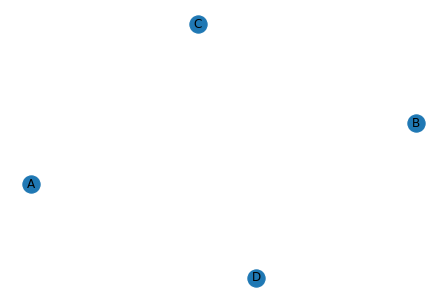

In [14]:
nx.draw(faceGraph,with_labels=1)

In [15]:
#finds all the faces a vertx is touching. Change i to switch vertices
i = 0
shapeMatrix = tetrahedron
arrTouchingFaces = []
for j in range(0,len(shapeMatrix)):
    if shapeMatrix[j][i] == 1:
        arrTouchingFaces.append(ascii_uppercase[j])
print(arrTouchingFaces)

['A', 'B', 'C']


In [16]:
#Reused From Above#
#This is used for testing edgeCreator
###################################################
vertId = 1

testFaceGraph = nx.Graph()
for i in range(0,len(tetrahedron)):
    testFaceGraph.add_node(ascii_uppercase[i])
    
shapeMatrix = tetrahedron
arrTouchingFaces = []
for j in range(0,len(shapeMatrix)):
    if shapeMatrix[j][vertId] == 1:
        arrTouchingFaces.append(ascii_uppercase[j])
print(arrTouchingFaces)
############################################
firstFace = arrTouchingFaces.pop(0)
edgeCreator(testFaceGraph, firstFace, arrTouchingFaces,vertId+1)
nx.draw(testFaceGraph,with_labels=1)

['A', 'C', 'D']


NameError: name 'edgeCreator' is not defined

{}

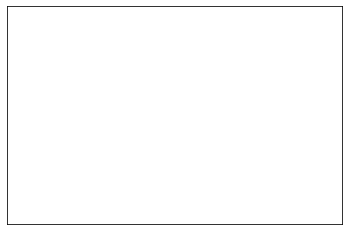

In [17]:
#tried to make the labels of the edges print
pos = nx.spring_layout(testFaceGraph)
edge_labels = nx.get_edge_attributes(testFaceGraph,'label')
nx.draw_networkx_edge_labels(testFaceGraph, pos, edge_labels, font_size=8)

In [18]:
arrTestFaces = [1,2,3,4]

arrCompletedFaces = []
arrCompletedFaces.append(arrTestFaces[len(arrTestFaces)-1])
print(arrTestFaces !=arrCompletedFaces)
print(arrCompletedFaces)
print(arrTestFaces.pop(0))
print(arrTestFaces)

True
[4]
1
[2, 3, 4]


In [19]:
#function to add edges to graph (networkx Graph, the starting point, all ending arraies)
def edgeCreator(graph, startingPoint, arrEndingPoints, vertName):
    if arrEndingPoints == []:
        return graph
    
    for face in arrEndingPoints:
        graph.add_edge(startingPoint, face, label=vertName)
        
    newStartingPoint = arrEndingPoints.pop(0)
    return edgeCreator(graph, newStartingPoint, arrEndingPoints,vertName)

In [20]:
#input a matrix of 1s and 0s indicating if a face is touching a vertx
def crazyGraphMaker(shapeMatrix):

    #sets up the Graph
    shapeGraph = nx.Graph()
    
    #puts all the nodes into the graph
    for i in range(0,len(shapeMatrix)):
        shapeGraph.add_node(ascii_uppercase[i])
    
    
    
    #loop through the vertices
    for i in range(0,len(shapeMatrix[0])):
        
        #loops through and logs all faces a vertex is touching
        arrTouchingFaces = []
        for j in range(0,len(shapeMatrix)):
            if shapeMatrix[j][i] == 1:
                arrTouchingFaces.append(ascii_uppercase[j])
    
        #takes the first face and the array of the rest to compute all edges related to this vertx 
        startingFace = arrTouchingFaces.pop(0)
        edgeCreator(shapeGraph, startingFace, arrTouchingFaces, i+1)
        
    return shapeGraph

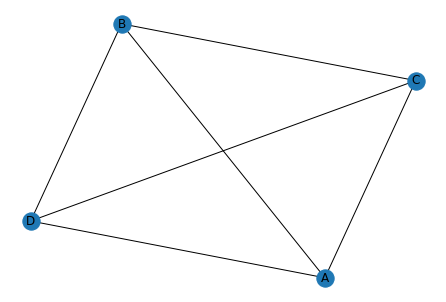

In [21]:
tetraGraph = crazyGraphMaker(tetrahedron)
nx.draw(tetraGraph, with_labels=1)

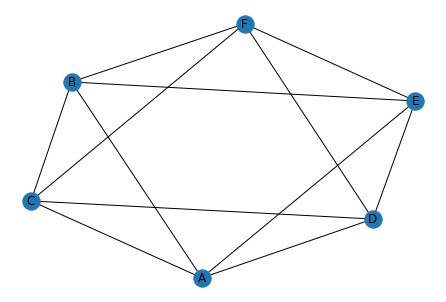

In [22]:
squareGraph = crazyGraphMaker(sqaure)
nx.draw(squareGraph, with_labels=1)

In [23]:
squareGraph.edges()
edge_labels = nx.get_edge_attributes(squareGraph,"label")
print(edge_labels)

{('A', 'B'): 2, ('A', 'E'): 4, ('A', 'C'): 3, ('A', 'D'): 4, ('B', 'E'): 5, ('B', 'C'): 6, ('B', 'F'): 6, ('C', 'D'): 7, ('C', 'F'): 7, ('D', 'E'): 8, ('D', 'F'): 8, ('E', 'F'): 8}


In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_uppercase

tetrahedron = [
    [1,1,1,0],
    [1,0,1,1],
    [1,1,0,1],
    [0,1,1,1]
]
sqaure = [
    [1,1,1,1,0,0,0,0],
    [1,1,0,0,1,1,0,0],
    [0,1,1,0,0,1,1,0],
    [0,0,1,1,0,0,1,1],
    [1,0,0,1,1,0,0,1],
    [0,0,0,0,1,1,1,1]
]

def edgeCreator(graph, startingPoint, arrEndingPoints, vertName):
    if arrEndingPoints == []:
        return graph
    
    for face in arrEndingPoints:
        graph.add_edge(startingPoint, face, weight=vertName)
        
    newStartingPoint = arrEndingPoints.pop(0)
    return edgeCreator(graph, newStartingPoint, arrEndingPoints,vertName)

def crazyGraphMaker(shapeMatrix):

    #sets up the Graph
    shapeGraph = nx.Graph()
    
    #puts all the nodes into the graph
    for i in range(0,len(shapeMatrix)):
        shapeGraph.add_node(ascii_uppercase[i])
    
    
    
    #loop through the vertices
    for i in range(0,len(shapeMatrix[0])):
        
        #loops through and logs all faces a vertex is touching
        arrTouchingFaces = []
        for j in range(0,len(shapeMatrix)):
            if shapeMatrix[j][i] == 1:
                arrTouchingFaces.append(ascii_uppercase[j])
    
        #takes the first face and the array of the rest to compute all edges related to this vertx 
        startingFace = arrTouchingFaces.pop(0)
        edgeCreator(shapeGraph, startingFace, arrTouchingFaces, i+1)
        
    return shapeGraph

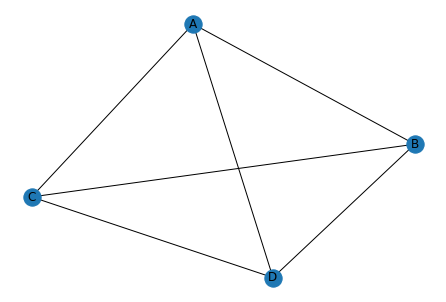

In [25]:
tetraGraph = crazyGraphMaker(tetrahedron)
nx.draw(tetraGraph, with_labels=1)

# trying multigraph

In [26]:
MG = nx.MultiGraph()
MG.add_node(1)
MG.add_node(2)

In [27]:
MG.add_edge(1,2,weight=1)
MG.add_edge(1,2,weight=2)
type(MG.edges())

networkx.classes.reportviews.MultiEdgeDataView

In [33]:
edges = MG.edges()
edges

MultiEdgeDataView([(1, 2), (1, 2)])

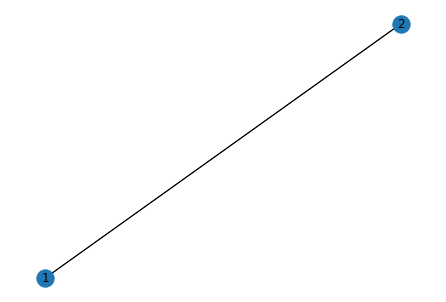

In [29]:
nx.draw(MG, with_labels=1)

In [3]:
arr1 = [1,2,3]
arr2 = [3,4,5]
print([i for i in arr1 if i in arr2])

[3]


In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_uppercase

tetrahedron = [
    [1,1,1,0],
    [1,0,1,1],
    [1,1,0,1],
    [0,1,1,1]
]
sqaure = [
    [1,1,1,1,0,0,0,0],
    [1,1,0,0,1,1,0,0],
    [0,1,1,0,0,1,1,0],
    [0,0,1,1,0,0,1,1],
    [1,0,0,1,1,0,0,1],
    [0,0,0,0,1,1,1,1]
]

def edgeCreator(graph, startingPoint, arrEndingPoints, vertName):
    if arrEndingPoints == []:
        return graph
    
    for face in arrEndingPoints:
        graph.add_edge(startingPoint, face, weight=vertName)
        
    newStartingPoint = arrEndingPoints.pop(0)
    return edgeCreator(graph, newStartingPoint, arrEndingPoints,vertName)

def crazyMultiGraphMaker(shapeMatrix):

    #sets up the Graph
    shapeGraph = nx.MultiGraph()
    
    #puts all the nodes into the graph
    for i in range(0,len(shapeMatrix)):
        shapeGraph.add_node(i)
    
    
    
    #loop through the vertices
    for i in range(0,len(shapeMatrix[0])):
        
        #loops through and logs all faces a vertex is touching
        arrTouchingFaces = []
        for j in range(0,len(shapeMatrix)):
            if shapeMatrix[j][i] == 1:
                arrTouchingFaces.append(j)
    
        #takes the first face and the array of the rest to compute all edges related to this vertx 
        startingFace = arrTouchingFaces.pop(0)
        edgeCreator(shapeGraph, startingFace, arrTouchingFaces, i+1)
        
    return shapeGraph

In [21]:
tetraMultiGraph = crazyMultiGraphMaker(tetrahedron)

In [22]:
tetraMultiGraph.edges()

MultiEdgeDataView([(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 3), (1, 2), (1, 2), (1, 3), (1, 3), (2, 3), (2, 3)])

In [23]:
squareMultiGraph = crazyMultiGraphMaker(sqaure)

In [24]:
squareMultiGraph.edges()

MultiEdgeDataView([(0, 1), (0, 1), (0, 4), (0, 4), (0, 2), (0, 2), (0, 3), (0, 3), (1, 4), (1, 4), (1, 2), (1, 2), (1, 5), (1, 5), (2, 3), (2, 3), (2, 5), (2, 5), (3, 4), (3, 4), (3, 5), (3, 5), (4, 5), (4, 5)])

In [27]:
squareMultiGraph[0][1]

AtlasView({0: {'weight': 1}, 1: {'weight': 2}})